In [ ]:
#  Generate random time series data

np.random.seed(10)  # Use 'seed()' to generate same random integers on every execution of code.

# Generate dates from '1999-01-01' to '1999-12-31' using 'date_range()'
time = pd.date_range(start = '1999-01-01', end = '1999-12-31', freq='D')

# Create random samples with length of dates and sort it
prices = sorted(np.random.randint(120, 500, len(time)))

# Prepare a DataFrame using 'Days' and 'Prices'
price_df = pd.DataFrame({'Days': time, 'Price': prices})
price_df.head()

,Days,Price
0,1999-01-01,120
1,1999-01-02,120
2,1999-01-03,122
3,1999-01-04,123
4,1999-01-05,123


In [ ]:
#Get the total number of rows and columns and data types of columns.
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Days    365 non-null    datetime64[ns]
 1   Price   365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [ ]:
#  Set 'Days' column as index of the DataFrame
price_ind_df = price_df.set_index('Days')
price_ind_df.head()

,Price
Days,
1999-01-01,120
1999-01-02,120
1999-01-03,122
1999-01-04,123
1999-01-05,123


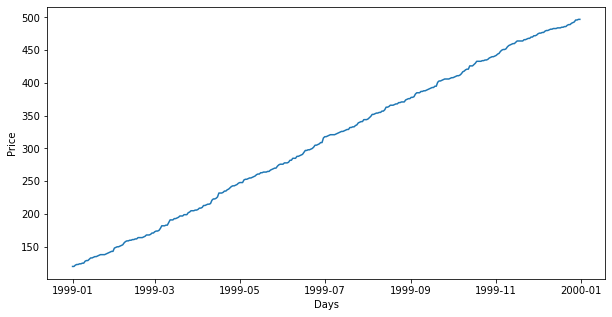

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_ind_df)
plt.show()

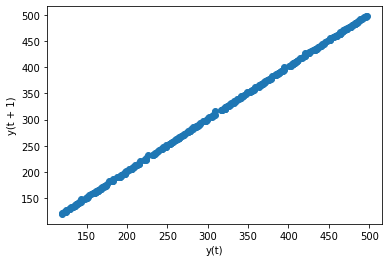

In [ ]:
#  Determine lag-1 autocorrelation using 'lag_plot()' function.
from pandas.plotting import lag_plot
lag_plot(price_ind_df)
plt.show()

In [ ]:
# Create lagged version of dataset

# Make an empty DataFrame
corr_df = pd.DataFrame()

# Create a column named 't' with 'Price' of the indexed price DataFrame
corr_df['t'] = price_ind_df['Price']

# Shift the values of 1 using 'shift()' function
lag1_df = price_ind_df.shift(1)

# Create a column named 't-1' with the shifted values
corr_df['t-1'] = lag1_df
corr_df

,t,t-1
Days,,
1999-01-01,120,NaN
1999-01-02,120,120.0
1999-01-03,122,120.0
1999-01-04,123,122.0
1999-01-05,123,123.0
...,...,...
1999-12-27,493,492.0
1999-12-28,496,493.0
1999-12-29,496,496.0


In [ ]:
#Print the lag-1 correlation coefficient
print("Lag-1 correlation coefficient:")
print(corr_df.corr())

Lag-1 correlation coefficient:
           t      t-1
t    1.00000  0.99995
t-1  0.99995  1.00000


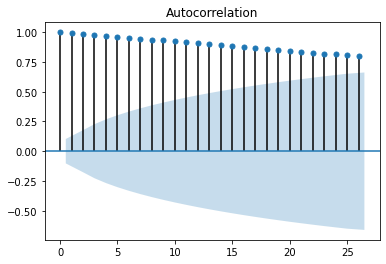

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(price_ind_df)
plt.show()

In [ ]:
#  Create a dataframe having 10 lagged values of the dataset and print correlation coefficients
# Make an empty DataFrame
corr_lag_df = pd.DataFrame()

# Create a column named 't' with 'Price' of the indexed price DataFrame
corr_lag_df['t'] = price_ind_df['Price']

# Using a for loop, Shift the values using 'shift()' function
# and create a column named 't-1' with the shifted values
for lag in range(1, 11):
  corr_lag_df['t-'+ str(lag)] =  price_ind_df.shift(lag)

# Create a correlation matrix for the lagged DataFrame
print(corr_lag_df.corr())

             t       t-1       t-2  ...       t-8       t-9      t-10
t     1.000000  0.999950  0.999907  ...  0.999693  0.999655  0.999619
t-1   0.999950  1.000000  0.999950  ...  0.999733  0.999690  0.999652
t-2   0.999907  0.999950  1.000000  ...  0.999776  0.999731  0.999688
t-3   0.999875  0.999907  0.999949  ...  0.999810  0.999774  0.999729
t-4   0.999844  0.999874  0.999906  ...  0.999841  0.999809  0.999773
t-5   0.999813  0.999843  0.999874  ...  0.999871  0.999840  0.999807
t-6   0.999778  0.999812  0.999842  ...  0.999904  0.999870  0.999838
t-7   0.999735  0.999777  0.999811  ...  0.999948  0.999903  0.999869
t-8   0.999693  0.999733  0.999776  ...  1.000000  0.999948  0.999903
t-9   0.999655  0.999690  0.999731  ...  0.999948  1.000000  0.999947
t-10  0.999619  0.999652  0.999688  ...  0.999903  0.999947  1.000000

[11 rows x 11 columns]


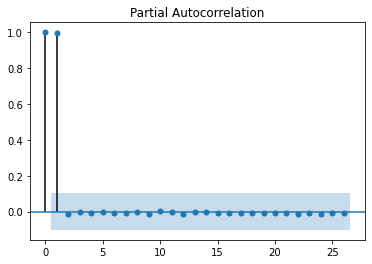

In [ ]:
#Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(price_ind_df)
plt.show()

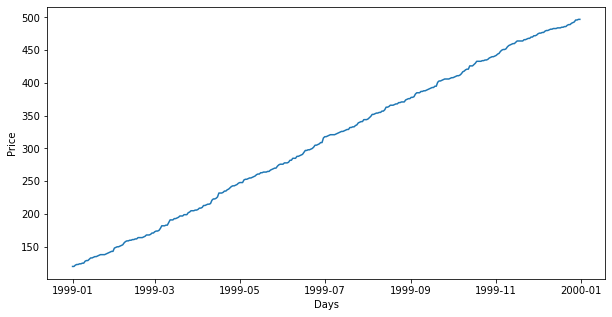

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_ind_df)
plt.show()

In [ ]:
#  Implement ADF test.
print('Results of Dickey Fuller Test:')
adf_df = adfuller(price_ind_df['Price'])
print('ADF Statistic:', adf_df[0])
print('p-value: ', adf_df[1])

Results of Dickey Fuller Test:
ADF Statistic: -0.5879426375197591
p-value:  0.8736832875040271


In [ ]:
#  Perform first-order differencing
first_or_diff_df = price_ind_df - price_ind_df.shift(1)  # y′t = yt − yt−1
first_or_diff_df

,Price
Days,
1999-01-01,NaN
1999-01-02,0.0
1999-01-03,2.0
1999-01-04,1.0
1999-01-05,0.0
...,...
1999-12-27,1.0
1999-12-28,3.0
1999-12-29,0.0


In [ ]:
#  Remove NaN values and check stationarity of the time series data
first_or_diff_df.dropna(inplace = True)
print('Results of Dickey Fuller Test:')
adf_df2 = adfuller(first_or_diff_df['Price'])
print('ADF Statistic:', adf_df2[0])
print('p-value: ', adf_df2[1])


Results of Dickey Fuller Test:
ADF Statistic: -15.611300153223214
p-value:  1.7784409866598814e-28


In [ ]:
#  Split the time series data into train and test sets.
train_size = int(len(price_ind_df) * 0.80)
train = price_ind_df[0:train_size]
test = price_ind_df[train_size:len(price_ind_df)]
print(train.shape)
print(test.shape)

(292, 1)
(73, 1)


In [ ]:
#  Fit an ARIMA model using train set

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(train, order = (1, 1, 0)) # p= 1, d = 1, q = 0
arima_train = model_1.fit()

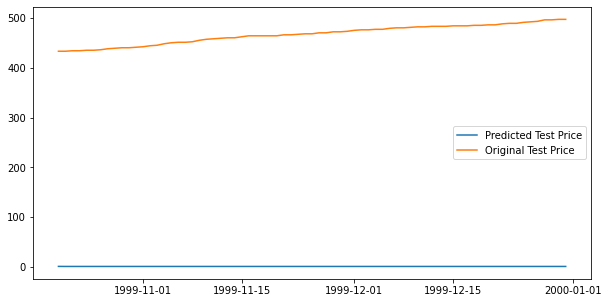

In [ ]:
#  Perform prediction using 'predict()' function.
start_index = len(train)
end_index = len(price_ind_df) - 1

# Predictions against the test set
pred_test1 = arima_train.predict(start = start_index, end = end_index)

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred_test1, label = 'Predicted Test Price')
plt.plot(test['Price'], label = 'Original Test Price')
plt.legend()
plt.show()


MAE: 6.091029395406673
RMSE: 7.650877089950868


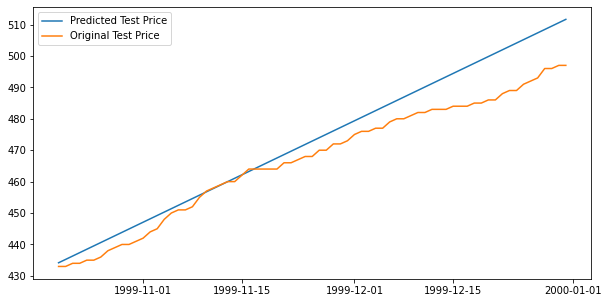

In [ ]:
# Perform prediction using 'predict()' function for original dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error
pred_test2 = arima_train.predict(start = start_index, end = end_index, typ = 'levels')

print("MAE:", mean_absolute_error(test, pred_test2))
print("RMSE:", np.sqrt(mean_squared_error(test, pred_test2)))

# Plot predictions and actual values
plt.figure(figsize = (10, 5))
plt.plot(pred_test2, label = 'Predicted Test Price')
plt.plot(test['Price'], label = 'Original Test Price')
plt.legend()
plt.show()

MAE: 0.8001108254921774
RMSE: 1.1288213324483822


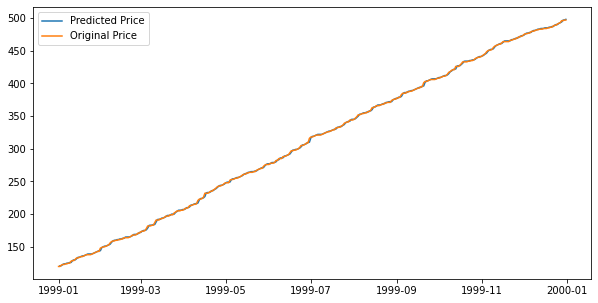

In [ ]:
# Build ARIMA model using entire dataset and plot prediction.

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
ar_model = ARIMA(price_ind_df, order = (1, 1, 0)).fit() # p= 1, d = 1, q = 0

# Predict using `predict()` function with start = 1 and end = (total observations - 1)
pred = ar_model.predict(1, len(price_ind_df) - 1, typ = 'levels' )   # start = 1, end = 364

# Print MAE and RMSE values
print("MAE:", mean_absolute_error(price_ind_df[1:], pred))
print("RMSE:", np.sqrt(mean_squared_error(price_ind_df[1:], pred)))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted Price')
plt.plot(price_ind_df['Price'], label = 'Original Price')
plt.legend()
plt.show()

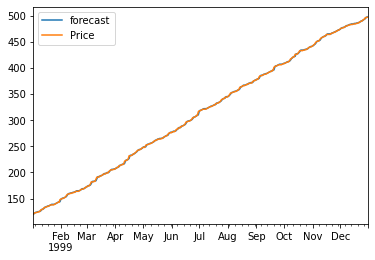

In [ ]:
#  Plot predictions for entire dataset using 'plot_predict()' function.
ar_model.plot_predict()
plt.show()